In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import os
import matplotlib.pyplot as plt
import random
from sklearn.metrics import precision_recall_fscore_support

In [3]:
transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomAffine(degrees=0, translate=(0.2, 0.2)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [4]:
dataset_path = r'D:\Image_dataset\mammals'
dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

class_names=dataset.classes

print(dataset.class_to_idx)

{'african_elephant': 0, 'alpaca': 1, 'american_bison': 2, 'anteater': 3, 'arctic_fox': 4, 'armadillo': 5, 'baboon': 6, 'badger': 7, 'blue_whale': 8, 'brown_bear': 9, 'camel': 10, 'dolphin': 11, 'giraffe': 12, 'groundhog': 13, 'highland_cattle': 14, 'horse': 15, 'jackal': 16, 'kangaroo': 17, 'koala': 18, 'manatee': 19, 'mongoose': 20, 'mountain_goat': 21, 'opossum': 22, 'orangutan': 23, 'otter': 24, 'polar_bear': 25, 'porcupine': 26, 'red_panda': 27, 'rhinoceros': 28, 'sea_lion': 29, 'seal': 30, 'snow_leopard': 31, 'squirrel': 32, 'sugar_glider': 33, 'tapir': 34, 'vampire_bat': 35, 'vicuna': 36, 'walrus': 37, 'warthog': 38, 'water_buffalo': 39, 'weasel': 40, 'wildebeest': 41, 'wombat': 42, 'yak': 43, 'zebra': 44}


In [5]:
train_size = int(0.7 * len(dataset))  
val_size = int(0.15 * len(dataset))   
test_size = len(dataset) - train_size - val_size  

In [6]:
train_data, val_data, test_data = random_split(dataset, [train_size, val_size, test_size])

In [7]:
batch_size = 32
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

In [16]:
model = models.densenet121(weights=False)

C:\Users\singh\AppData\Roaming\Python\Python312\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [17]:
model.classifier = nn.Sequential(
    nn.Dropout(0.5),  
    nn.Linear(model.classifier.in_features, len(class_names))
)

In [21]:
model.train()

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [23]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

In [25]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [27]:
num_epochs = 15 
for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()  

        # forward pass
        outputs = model(inputs)
        loss = loss_function(outputs, labels)

        # backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct / total

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")


Epoch [1/15], Loss: 3.5277, Accuracy: 9.41%
Epoch [2/15], Loss: 3.3261, Accuracy: 13.40%
Epoch [3/15], Loss: 3.2084, Accuracy: 15.77%
Epoch [4/15], Loss: 3.0622, Accuracy: 18.70%
Epoch [5/15], Loss: 2.9736, Accuracy: 21.33%
Epoch [6/15], Loss: 2.8880, Accuracy: 22.70%
Epoch [7/15], Loss: 2.8126, Accuracy: 23.85%
Epoch [8/15], Loss: 2.7486, Accuracy: 25.85%
Epoch [9/15], Loss: 2.6796, Accuracy: 27.51%
Epoch [10/15], Loss: 2.6155, Accuracy: 29.08%
Epoch [11/15], Loss: 2.5545, Accuracy: 31.17%
Epoch [12/15], Loss: 2.4901, Accuracy: 31.88%
Epoch [13/15], Loss: 2.4252, Accuracy: 34.09%
Epoch [14/15], Loss: 2.3751, Accuracy: 35.29%
Epoch [15/15], Loss: 2.3338, Accuracy: 37.22%


In [28]:
torch.save(model, "DenseNet121_model3.pth")


In [29]:
model.eval()  
val_loss = 0.0
val_correct = 0
val_total = 0
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        loss = loss_function(outputs, labels)
        val_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        val_total += labels.size(0)
        val_correct += (predicted == labels).sum().item()


In [30]:
val_loss /= len(val_loader)
val_accuracy = 100 * val_correct / val_total
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

Validation Loss: 2.3246, Validation Accuracy: 39.19%


In [31]:
model.eval()  
test_loss = 0.0
test_correct = 0
test_total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        loss = loss_function(outputs, labels)
        test_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

In [32]:
test_loss /= len(test_loader)
test_accuracy = 100 * test_correct / test_total
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

Test Loss: 2.3448, Test Accuracy: 36.09%


In [21]:
def show_random_test_prediction(model, test_data, class_names):
    model.eval()  

    random_idx = random.randint(0, len(test_data) - 1)
    image, true_label = test_data[random_idx]

    image_tensor = image.unsqueeze(0).to(device)  

    with torch.no_grad(): 
        output = model(image_tensor)
        _, predicted_label = torch.max(output, 1)

    image_np = image.cpu().numpy().transpose((1, 2, 0)) 
    image_np = np.clip(image_np * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406]), 0, 1) 

    plt.imshow(image_np)
    plt.title(f"Predicted: {class_names[predicted_label.item()]}, Actual: {class_names[true_label]}")
    plt.axis("off")
    plt.show()

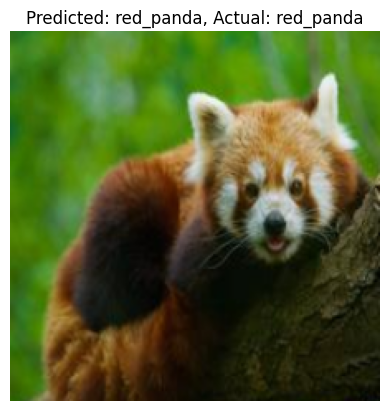

In [25]:
show_random_test_prediction(model, test_data, class_names)

In [35]:
val_loss = 0.0
val_correct = 0
val_total = 0
all_val_labels = []
all_val_preds = []

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        loss = nn.CrossEntropyLoss()(outputs, labels)
        val_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        val_total += labels.size(0)
        val_correct += (predicted == labels).sum().item()

        all_val_labels.extend(labels.cpu().numpy())
        all_val_preds.extend(predicted.cpu().numpy())

val_loss /= len(val_loader)
val_accuracy = 100 * val_correct / val_total
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

precision, recall, f1, _ = precision_recall_fscore_support(all_val_labels, all_val_preds, average='weighted')

print(f"Validation Precision: {precision:.4f}")
print(f"Validation Recall: {recall:.4f}")
print(f"Validation F1-Score: {f1:.4f}")

test_loss = 0.0
test_correct = 0
test_total = 0
all_test_labels = []
all_test_preds = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        loss = nn.CrossEntropyLoss()(outputs, labels)
        test_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

        all_test_labels.extend(labels.cpu().numpy())
        all_test_preds.extend(predicted.cpu().numpy())

test_loss /= len(test_loader)
test_accuracy = 100 * test_correct / test_total
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

precision, recall, f1, _ = precision_recall_fscore_support(all_test_labels, all_test_preds, average='weighted')

print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1-Score: {f1:.4f}")

Validation Loss: 2.3357, Validation Accuracy: 38.22%
Validation Precision: 0.4637
Validation Recall: 0.3822
Validation F1-Score: 0.3723
Test Loss: 2.3453, Test Accuracy: 37.55%
Test Precision: 0.4003
Test Recall: 0.3755
Test F1-Score: 0.3513


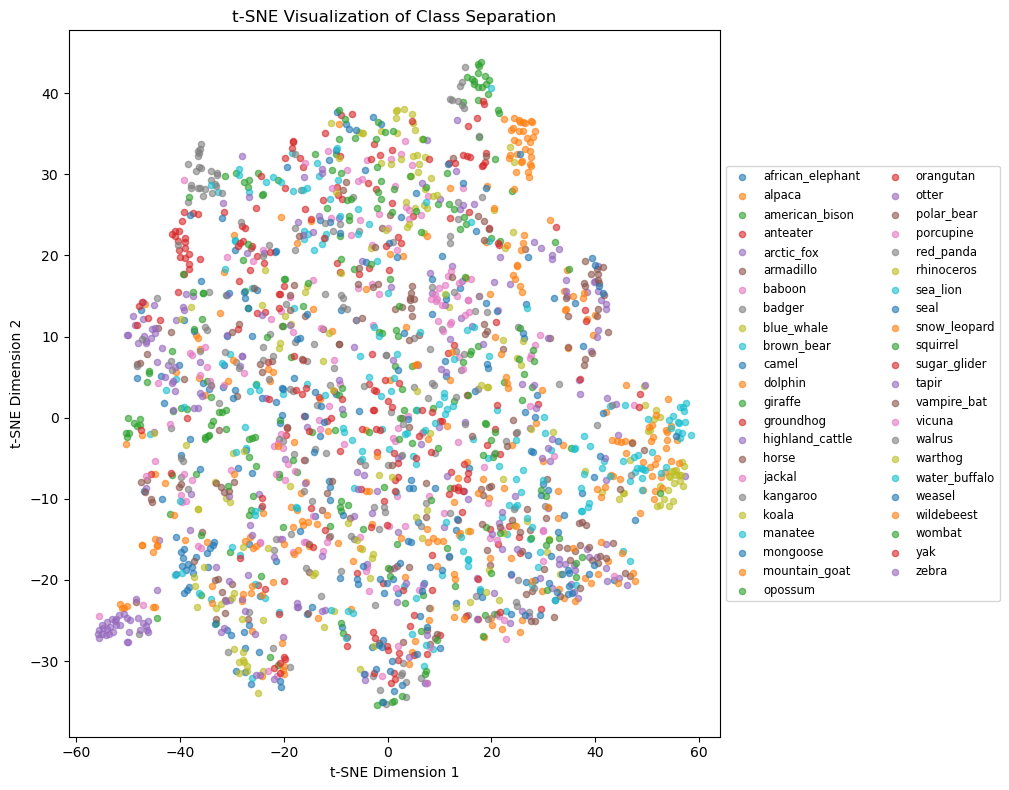

In [39]:
from sklearn.manifold import TSNE
import cv2

def extract_features_for_tsne(model, data_loader, device):
    model.eval()
    features = []
    labels = []

    with torch.no_grad():
        for inputs, lbls in data_loader:
            inputs = inputs.to(device)
            lbls = lbls.to(device)

            features_batch = model(inputs)
            features.append(features_batch.cpu().numpy())
            labels.append(lbls.cpu().numpy())

    features = np.concatenate(features)
    labels = np.concatenate(labels)
    return features, labels

def visualize_tsne(features, labels, class_names):
    tsne = TSNE(n_components=2, random_state=42)
    tsne_features = tsne.fit_transform(features)

    plt.figure(figsize=(12, 8))
    
    for i, class_name in enumerate(class_names):
        idx = labels == i
        plt.scatter(tsne_features[idx, 0], tsne_features[idx, 1], label=class_name, alpha=0.6, s=20)

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', ncol=2)

    plt.title("t-SNE Visualization of Class Separation")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")

    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()

features, labels = extract_features_for_tsne(model, val_loader, device)
visualize_tsne(features, labels, class_names)